In [18]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
np.random.seed(7); sns.set(); plt.rcParams['figure.figsize']=(9,4)

In [8]:
df = pd.read_csv('../data/processed/combined_cleaned_data.csv')
df["date"] = pd.to_datetime(df["date"])

df["date"] = df["date"].values.astype("datetime64[s]").astype(float)
ticker_map = {"AAPL": 1, "MSFT": 2, "GOOGL": 3, "AMZN": 4, "META": 5}
df["ticker"] = df["ticker"].map(ticker_map)
df.head()

,date,close,ticker
0,1.747786e+09,0.177952,1
1,1.747872e+09,0.158905,1
2,1.747958e+09,0.000000,1
3,1.748304e+09,0.128898,1
4,1.748390e+09,0.134377,1


In [9]:
df_feat = df.dropna().copy()
df_feat.head()
cut=int(len(df_feat)*0.8)
train, test = df_feat.iloc[:cut], df_feat.iloc[cut:]
features = ['date', 'ticker']
X_tr, X_te = train[features], test[features]
y_tr_reg, y_te_reg = train['close'], test['close']
y_tr_clf, y_te_clf = train['close'], test['close']

In [12]:
reg = Pipeline([('scaler', StandardScaler()), ('linreg', LinearRegression())])
reg.fit(X_tr, y_tr_reg)
pred = reg.predict(X_te)
rmse = mean_squared_error(y_te_reg, pred)
print('RMSE:', rmse)

print(y_tr_clf)

RMSE: 0.017607149905240517
0      0.177952
1      0.158905
2      0.000000
3      0.128898
4      0.134377
         ...   
247    0.905495
248    0.907005
249    0.920894
250    0.815821
251    0.689010
Name: close, Length: 252, dtype: float64


MAE : 0.214498
MSE : 0.055237
RMSE: 0.235026
R^2 : 0.076886


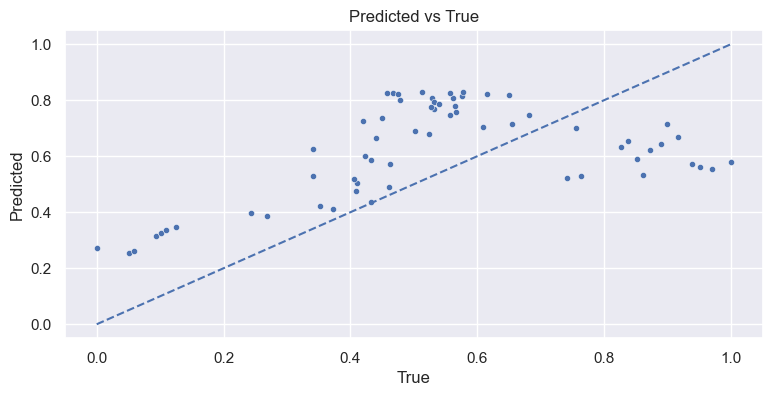

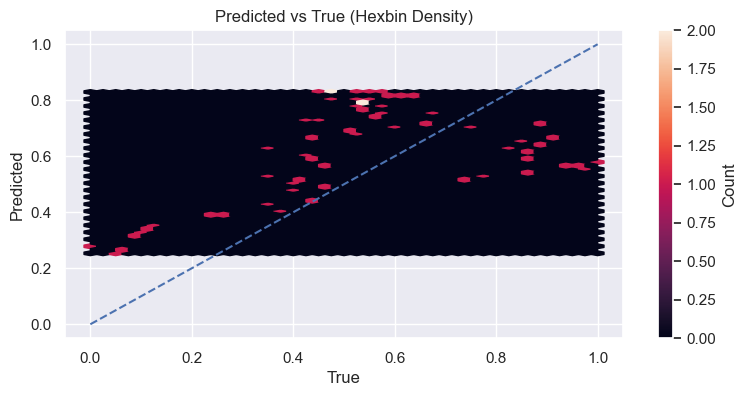

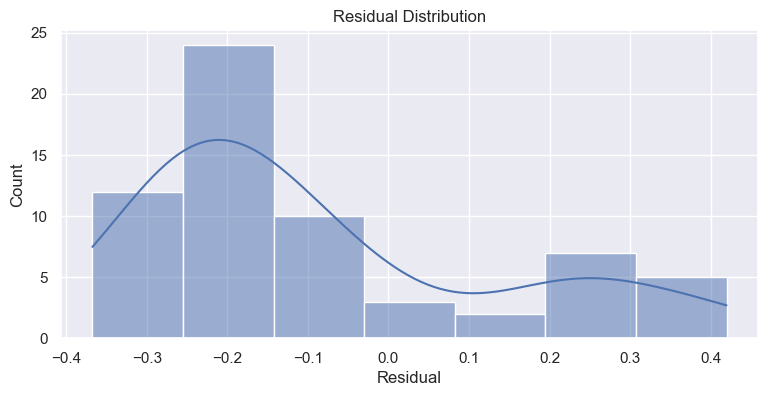

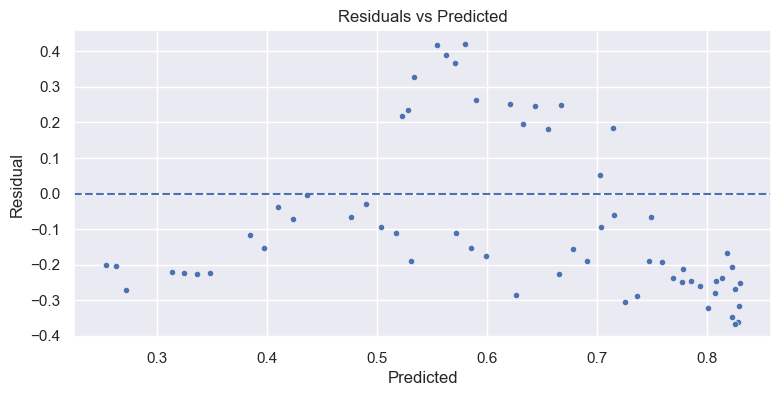

In [ ]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

clf.fit(X_tr, y_tr_clf)
predr = clf.predict(X_te)
mae  = mean_absolute_error(y_te_reg, predr)
mse  = mean_squared_error(y_te_reg, predr)
rmse = np.sqrt(mse)
r2   = r2_score(y_te_reg, predr)

print(f"MAE : {mae:.6f}")
print(f"MSE : {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R^2 : {r2:.6f}")

plt.figure()
sns.scatterplot(x=y_te_reg, y=predr, s=20)
lims = [min(y_te_reg.min(), predr.min()), max(y_te_reg.max(), predr.max())]
plt.plot(lims, lims, linestyle="--") 
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Predicted vs True")
plt.show()

plt.figure()
plt.hexbin(y_te_reg, predr, gridsize=40)
plt.plot(lims, lims, linestyle="--")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Predicted vs True (Hexbin Density)")
plt.colorbar(label="Count")
plt.show()

resid = y_te_reg - predr

plt.figure()
sns.histplot(resid, kde=True)
plt.xlabel("Residual")
plt.title("Residual Distribution")
plt.show()

plt.figure()
sns.scatterplot(x=predr, y=resid, s=20)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.show()